In [1]:
pip install pandas numpy matplotlib yfinance statsmodels plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'AAPL'  # Example: Apple Inc. stock

# Fetch historical data
stock_data = yf.download(ticker_symbol, start='2020-01-01', end='2021-01-01')


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Calculate 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Adj Close'].rolling(window=200).mean()

# Calculate volatility (standard deviation of daily returns)
volatility = stock_data['Daily_Return'].std()


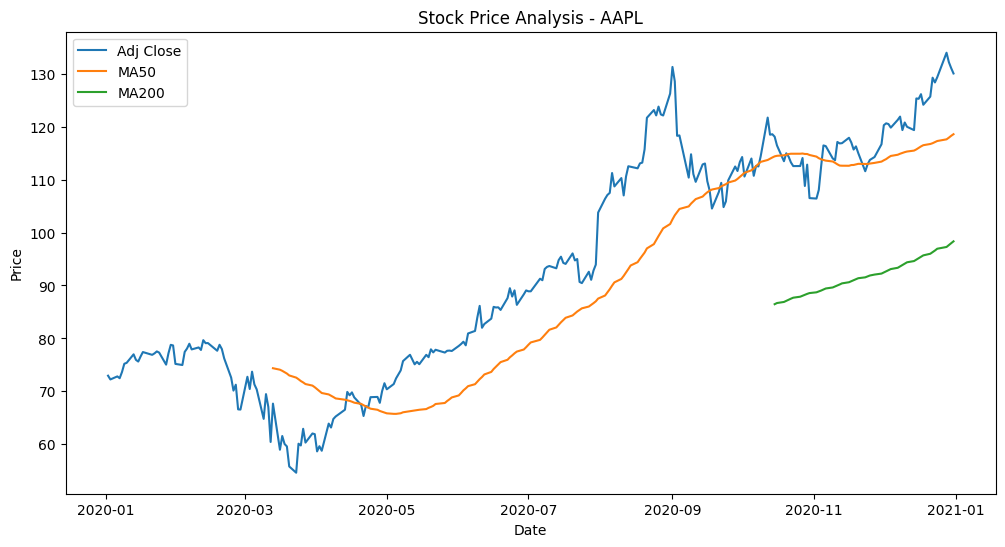

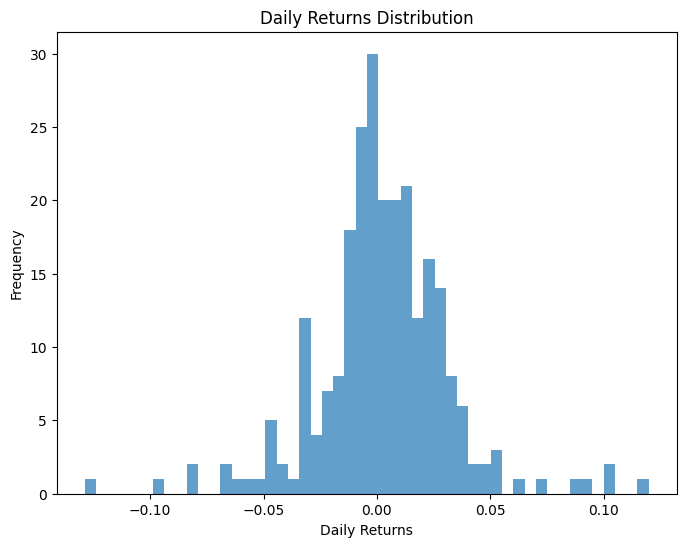

Volatility (Standard Deviation of Daily Returns): 0.02941782468408578


In [4]:
import matplotlib.pyplot as plt

# Plot closing prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Adj Close'], label='Adj Close')
plt.plot(stock_data['MA50'], label='MA50')
plt.plot(stock_data['MA200'], label='MA200')
plt.title('Stock Price Analysis - ' + ticker_symbol)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot daily returns distribution
plt.figure(figsize=(8, 6))
plt.hist(stock_data['Daily_Return'].dropna(), bins=50, alpha=0.7)
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

print("Volatility (Standard Deviation of Daily Returns):", volatility)


In [9]:
import statsmodels.api as sm

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(stock_data['Adj Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


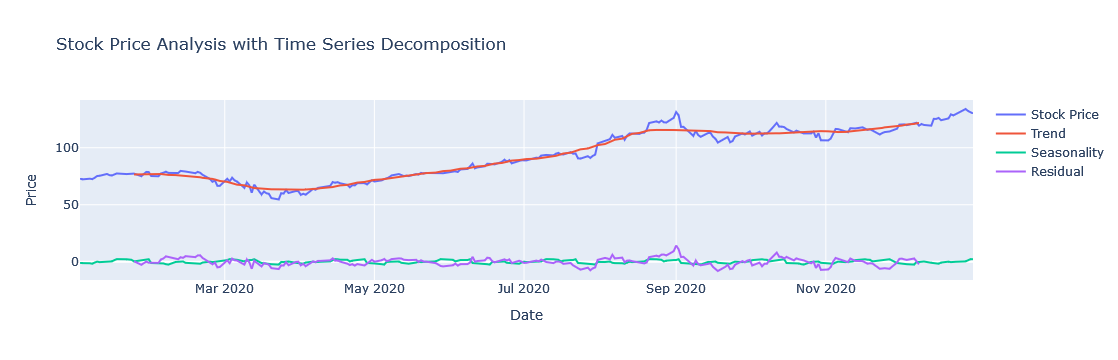

In [10]:
import plotly.graph_objs as go

# Create interactive plot for stock prices with decomposition components
trace_price = go.Scatter(x=stock_data.index, y=stock_data['Adj Close'], mode='lines', name='Stock Price')
trace_trend = go.Scatter(x=stock_data.index, y=trend, mode='lines', name='Trend')
trace_seasonal = go.Scatter(x=stock_data.index, y=seasonal, mode='lines', name='Seasonality')
trace_residual = go.Scatter(x=stock_data.index, y=residual, mode='lines', name='Residual')

data = [trace_price, trace_trend, trace_seasonal, trace_residual]

# Layout
layout = go.Layout(title='Stock Price Analysis with Time Series Decomposition',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

# Plot
fig = go.Figure(data=data, layout=layout)
fig.show()


In [11]:
# Calculate MACD (Moving Average Convergence Divergence)
short_ema = stock_data['Adj Close'].ewm(span=12, adjust=False).mean()
long_ema = stock_data['Adj Close'].ewm(span=26, adjust=False).mean()
macd = short_ema - long_ema
signal_line = macd.ewm(span=9, adjust=False).mean()

# Calculate RSI (Relative Strength Index)
delta = stock_data['Adj Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))


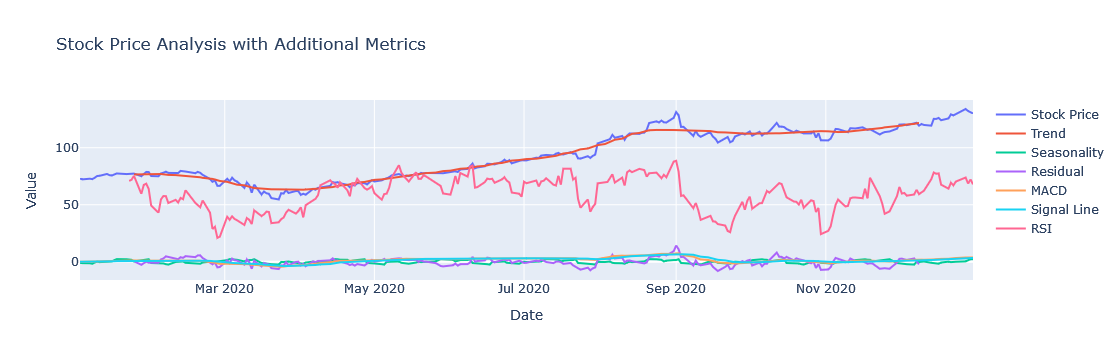

In [12]:
# Create interactive plot for stock prices with additional metrics
trace_macd = go.Scatter(x=stock_data.index, y=macd, mode='lines', name='MACD')
trace_signal_line = go.Scatter(x=stock_data.index, y=signal_line, mode='lines', name='Signal Line')
trace_rsi = go.Scatter(x=stock_data.index, y=rsi, mode='lines', name='RSI')

data = [trace_price, trace_trend, trace_seasonal, trace_residual, trace_macd, trace_signal_line, trace_rsi]

# Layout
layout = go.Layout(title='Stock Price Analysis with Additional Metrics',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Value'))

# Plot
fig = go.Figure(data=data, layout=layout)
fig.show()


In [1]:
pip freeze


annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
diskcache==5.6.3
executing==2.0.1
fastapi==0.103.2
fastjsonschema==2.19.1
fonttools==4.51.0
fqdn==1.5.1
frozendict==2.4.4
git-filter-repo==2.38.0
h11==0.14.0
html5lib==1.1
httpcore==1.0.5
httpx==0.27.0
idna==3.4
ipykernel==6.29.4
ipython==8.24.0
ipywidgets==8.1.2
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
json5==0.9.25
jsonpointer==2.4
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.1
jupyter_core==5.7.2
jupyter_server==2.14.0
jupyter_server_terminals==0.5.3
jupyterlab==4.1.8
jupyterlab_pyg